## Лабораторная работа 2

### I. Нахождение числовых характеристик различных распределений.

    excess   - коэффициент эксцесса.
    skewness - коэффициент ассиметрии.
    median   - медиана.
    cov      - коэффициент вариации.
    variance - дисперсия.
    expect   - математическое ождиание.
    quant1   - квантиль 1/3.
    quant2   - квантиль 3/4.

In [2]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [17]:
def print_data(data):
    size = np.size(data)
    print(f'excess:   {stat.moment(data, 4) / stat.moment(data, 2) ** 2}')
    print(f'skewness: {stat.kstat(data, 3) / stat.kstat(data, 2) ** 1.5}')
    print(f'median:   {(data[size // 2 - 1] + data[size // 2]) / 2}')
    print(f'cov:      {np.var(data) ** 0.5 / np.mean(data)}')
    print(f'variance: {np.var(data)}')
    print(f'expect:   {np.mean(data)}')
    print(f'quant1:   {np.quantile(data, 1 / 3)}')
    print(f'quant2:   {np.quantile(data, 1 / 4)}')

#### 1.Распределние Гаусса.

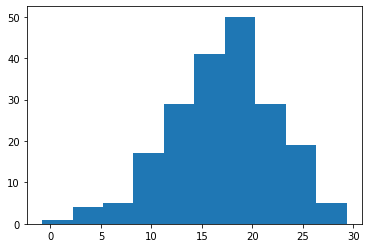

excess:   3.3773822998768614
skewness: -0.3904146717884575
median:   18.5644230299095
cov:      0.3014513944813664
variance: 26.609304365309573
expect:   17.111948454668802
quant1:   15.315106652354142
quant2:   13.790873354260032


In [21]:
n = 200
gauss_exp = 17
gauss_var = 22

gauss = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
plt.hist(gauss)
plt.show()
print_data(gauss)

#### 2.Распределение Пуассона.

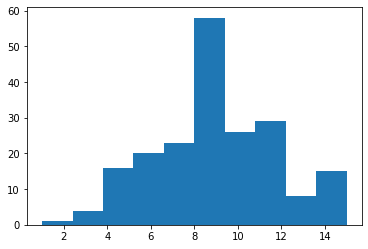

excess:   2.714206619335284
skewness: 0.0846058603743195
median:   10.0
cov:      0.3163807720509249
variance: 7.8309750000000005
expect:   8.845
quant1:   8.0
quant2:   7.0


In [60]:
poission_param = 9
poisson = np.random.default_rng().poisson(poission_param, n)

plt.hist(poisson)
plt.show()
print_data(poisson)

#### 3.Распределение Коши

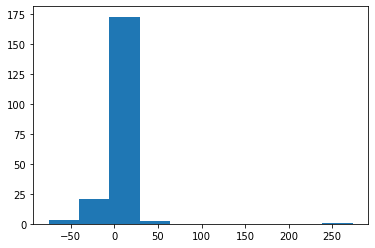

excess:   113.57914960716745
skewness: 8.806440376347705
median:   -5.96150655856261
cov:      63.51515391314581
variance: 499.38929250828414
expect:   0.3518376071085216
quant1:   -1.149799547284543
quant2:   -2.0685369370543376


In [49]:
cauchy_shift = 0
cauchy_scale = 2

cauchy = stat.cauchy.rvs(loc=cauchy_shift, scale = cauchy_scale, size=n)
plt.hist(cauchy)
plt.show()
print_data(cauchy)

#### 4.Распределение экспоненциальное

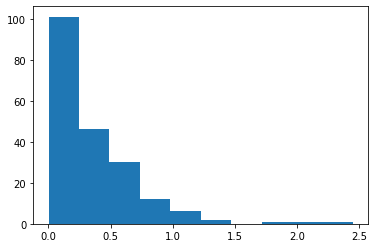

excess:   10.83098759931455
skewness: 2.301404749763541
median:   0.038942277040703376
cov:      1.0471388937887272
variance: 0.13390490341787642
expect:   0.34945716507981445
quant1:   0.13149776496624924
quant2:   0.07743890547295526


In [51]:
exp_param = 3

exp = np.random.default_rng().exponential(1 / exp_param, n)
plt.hist(exp)
plt.show()
print_data(exp)

#### 5.Распределение равномерное.

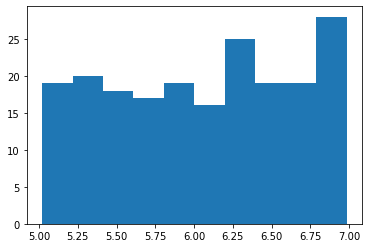

excess:   1.7645971660014015
skewness: -0.11071455645334483
median:   5.453664826264141
cov:      0.09718217265473195
variance: 0.34591004873973785
expect:   6.051945175669723
quant1:   5.709654588435695
quant2:   5.538229453883279


In [55]:
a = 5
b = 7
uniform = np.random.default_rng().uniform(low=a, high=b, size=n)
plt.hist(uniform)

plt.show()
print_data(uniform)

### II. Интервальные оценки.

In [3]:
import math
import itertools

In [4]:
def interval_gauss_mu(data, alpha, var):
    point_expectation = np.mean(data)
    u_half_alpha = -stat.norm.ppf(alpha / 2)
    
    mu_lower = point_expectation - u_half_alpha * (var / n)**0.5
    mu_higher = point_expectation + u_half_alpha * (var / n)**0.5
    return mu_lower, mu_higher;

In [5]:
def interval_gauss_variance(data, n, alpha):
    s2 = np.var(data) * n / (n - 1)
    df = n - 1
    chi2_half_alpha = stat.chi2.ppf(alpha / 2, df)
    chi2_one_minus_half_alpha = stat.chi2.ppf(1 - alpha / 2, df)

    sigma2_lower = (n - 1) * s2 / chi2_one_minus_half_alpha
    sigma2_higher = (n - 1) * s2 / chi2_half_alpha
    return sigma2_lower, sigma2_higher

In [6]:
def group_data(data, k):
    
    # переведем ряд в вариационный и вычислим начальную и конечную точку
    x0 = math.floor(min(data))
    xn = math.ceil(max(data))
    
    # найдем границы отрезков
    interval_size = (xn - x0) / k
    bounds = [x0 + i * interval_size for i in range(k + 1)]
    
    # выделим отрезки
    a, b = itertools.tee(bounds)
    next(b, None)
    intervals = list(zip(a, b))
    
    return intervals

In [7]:
def interval_student_mu(data, n, alpha):
    point_expectation = np.mean(data)
    s2 = np.std(data) * n / (n - 1)
    t_half_alpha = -stat.t.ppf(q=alpha / 2, df=n-1)
    
    mu_lower = point_expectation - t_half_alpha * (s2 / n)**0.5
    mu_higher = point_expectation + t_half_alpha * (s2 / n)**0.5
    return mu_lower, mu_higher

#### А. Доверительные интервалы для гауссовского распределения.

    1.Оценкка математического ожидания.

In [29]:
alpha = 0.05
gauss_exp = 4
gauss_var = 9

gauss = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
mu_lower, mu_higher = interval_gauss_mu(gauss, alpha, gauss_var)

print(f'MU- : {mu_lower} < MU: {np.mean(gauss)} < MU+: {mu_higher}')

MU- : 3.7600464366844792 < MU: 4.1758175839893825 < MU+: 4.591588731294286


    2.Оценка дисперсии.

In [30]:
sigma2_lower, sigma2_higher = interval_gauss_variance(gauss, n, alpha)

print(f'VAR- : {sigma2_lower} < VAR: {np.var(gauss)} < VAR+: {sigma2_higher}')

VAR- : 6.381253003909891 < VAR: 7.656217202399581 < VAR+: 9.462272531123068


####  Б. Группированные доверительные интервалы гауссовского распределения.

    1.Оценкка математического ожидания.

In [35]:
k = 8
group_gauss = group_data(gauss, k)

mu_lower, mu_higher = interval_gauss_mu(group_gauss, alpha, gauss_var)
print(f'MU- : {mu_lower} < MU: {np.mean(group_gauss)} < MU+: {mu_higher}')

MU- : 4.084228852695096 < MU: 4.5 < MU+: 4.915771147304904


    2.Оценка дисперсии.

In [ ]:
sigma2_lower, sigma2_higher = interval_gauss_variance(group_gauss, n, alpha)
print(f'VAR- : {sigma2_lower} < VAR: {np.var(group_gauss)} < VAR+: {sigma2_higher}')

####  В. Доверительный интервал математического ожидания через квантили стьюдента.

In [32]:
mu_lower_student, mu_higher_student = interval_student_mu(gauss, n, alpha)

print(f'MU- : {mu_lower_student} < MU: {np.mean(gauss)} < MU+: {mu_higher_student}')

MU- : 3.9432900620011355 < MU: 4.1758175839893825 < MU+: 4.40834510597763
